In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv') #dataframe object

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.head()#first 5 elements

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.tail(10)#last 10 elements

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
df.describe() #summary statistics

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df['Age'] # this takes only 1 column, as it is a vector

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [14]:
df[['Age', 'Annual Income (k$)','Spending Score (1-100)']] #dataframe

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [17]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
#X is the dataframe containing the features

In [18]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [20]:
X_Scaled = StandardScaler().fit_transform(X)

In [21]:
X_Scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [42]:
clustering = DBSCAN(eps=0.6, min_samples=6).fit(X_Scaled)
labels = clustering.labels_ 

In [43]:
labels

array([-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0,  2,  0,  2,  0,  0,  0,  1,  0, -1,  0,  2,  0,
        2,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  3,  0,  3,  0,  3, -1,  3,  4,  3,  0,  3, -1,  3,
        4,  3, -1,  3, -1,  3, -1,  3, -1,  3,  0,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3,  4,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1,  3, -1,
        3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [56]:
DBSCAN_dataset = X.copy()

In [57]:
DBSCAN_dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [58]:
DBSCAN_dataset['Cluster'] = labels

In [59]:
DBSCAN_dataset

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,-1
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,-1
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [60]:
DBSCAN_dataset['Cluster'] == -1

0       True
1      False
2       True
3      False
4       True
       ...  
195     True
196     True
197     True
198     True
199     True
Name: Cluster, Length: 200, dtype: bool

In [61]:
# Assuming DBSCAN_dataset is your DataFrame
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster'] == -1]

In [62]:
outliers

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,-1
2,20,16,6,-1
4,31,17,40,-1
6,35,18,6,-1
8,64,19,3,-1
10,67,19,14,-1
11,35,19,99,-1
12,58,20,15,-1
14,37,20,13,-1
18,52,23,29,-1


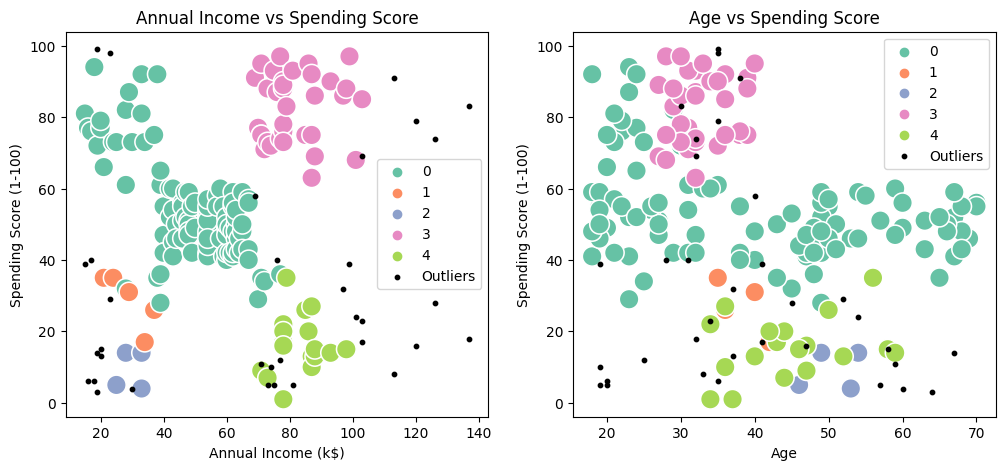

In [51]:
#optional
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for 'Annual Income' vs 'Spending Score'
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
                s=10, label='Outliers', c="k")

axes[0].legend()
axes[0].set_title('Annual Income vs Spending Score')

# Scatter plot for 'Age' vs 'Spending Score'
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'],
                s=10, label='Outliers', c="k")

axes[1].legend()
axes[1].set_title('Age vs Spending Score')

plt.show()

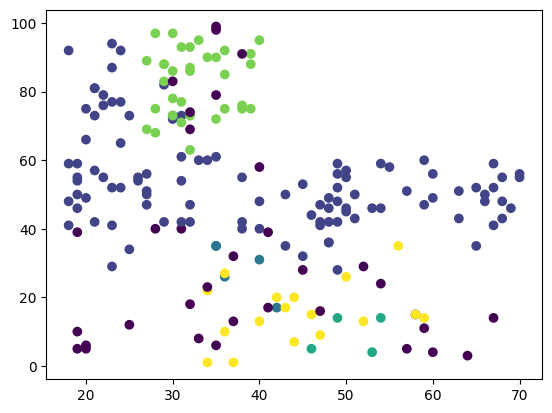

In [63]:
plt.scatter(X['Age'], X['Spending Score (1-100)'], c=labels)

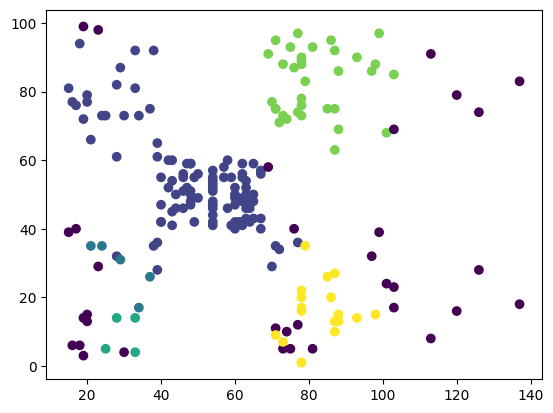

In [98]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels)